# Life Actuarial functions on python

The classes implemented on the ``life.discrete_case`` were build based on the book: [Dickson, D.C.M. and Hardy, M.R. and Waters, H.R. - Actuarial Mathematics for Life Contingent Risk. 2013.](https://www.amazon.com.br/Actuarial-Mathematics-Life-Contingent-Risks/dp/1107044073)

This notebook uses a csv file that contains the life tables necessary to calculate the actuarial functions. 

Consider the following variables:

* $i$: rate.
* $x$: age.
* discount factor: $v = \left(\dfrac{1}{1+i} \right)$
* $n$: years of contract.
* $m$: years of deffering.
* $\omega$: the maximum age a person can reach given according to a life table.
* $B$: Benefit.

The following methods were build separately by ``python classes``. All functions which refers to life insurance's variations are implemented on the ``life_insurance`` class. And all functions which refers to life annuities variations are implemented on the ``life_annuity`` class. 

First, lets import the life tables:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

qx = pd.read_csv('life_tables.csv')

qx.head()

%load_ext autoreload
%autoreload 2

Each column of pandas DataFrame named ``qx`` refers to some of the most famous life tables used in the past. We'll use the female "AT_2000" life table on the examples, but feel free to use any one of those on the builded classes. Beyound that, let consider a client with the following attributes:

* rate ($i$) = 0.06
* age ($x$) = 30
* year of contract ($n$) = 25
* years of deffering ($m$) = 10
* benefit ($B$) = 1

It is also possible to calculate fractionals premiums by setting the ``frac`` parameter on each method. For all the examples bellow the premiums will be unique.

In [2]:
i = .06
x = 30
n = 25
m = 10
B = 1


# Pure premium for  the annual life insurance's variations

The class ``life_insurance`` contains five variations of annual life insurance implemented. To calculate all of those variations we just have to attribute the class to some object:

In [3]:
from life.discrete_case import life_insurance

#Creating the class
li = life_insurance(table=qx['AT_2000_F'])

Beyound the life insurance's functions the class ``life_insurance`` also provides the life expectation, $\mathring{e}_{x}$ of a client given some age.

In [4]:
# life expectation
li.life_expectation(age=x)

56.0

## The whole life insurance: 
$$
A_x = B \cdot \sum_{k=0}^{\omega - x} v^{k} {}_{k}p_{x} q_{x+k}
$$

In [5]:
# Whole life insurance
li.Ax(i=i, age=x, B=B)

0.054494739588147295

## The term life insurance:
$$
A_{_{x}^{1}:\overline{n}|} = B \cdot \sum_{k=0}^{n} v^{k} {}_{k}p_{x} q_{x+k} \hspace{.5cm} \text{for } (n+x)<\omega
$$

In [6]:
# Term life insurance
li.Ax_tmp(i=i, age=x, tmp=n, B=B)

0.01048685811919159

## The deffered whole life insurance:
$$
{}_{m|}A_x = B \cdot v^{m} {}_{m}p_{x}  \cdot \sum_{k=0}^{\omega-x} v^{k} {}_{k}p_{x+m} q_{x+m+k} \hspace{.5cm} \text{for } (x+m)<\omega
$$

In [7]:
# Deffered whole life insurance
li.def_Ax(i=i, age=x, n_def=m, B=B)

0.05073688133172147

## The deffered term life insurance:
$$
{}_{m|}A_{_{x}^{1}:\overline{n}|} = B \cdot v^{m} {}_{m}p_{x}  \cdot \sum_{k=0}^{n} v^{k} {}_{k}p_{x+m} q_{x+m+k} \hspace{.5cm} \text{for } (x+m+n)<\omega
$$

In [8]:
# Defferd term life insurance
li.def_Ax_tmp(i=i, age=x, n_def=m, tmp=n, B=B)

0.01344516456119554

## Pure Endowment

$$
{}_{n}E_{x} = A_{_{x}:{}_{\overline{n}|}^{1}} = B \cdot v^{m} {}_{m}p_{x}
$$

In [9]:
# Pure Endowment
li.Pure_Endow(i=i, age=x, tmp=n, B=B)

0.22699118838864613

## Endowment

$$
A_{x:\overline{n}|} = B \cdot A_{_{x}:{}_{\overline{n}|}^{1}} + A_{_{x}^{1}:\overline{n}|}
$$

In [10]:
# Endowment
li.Endowment(i=i, age=x, tmp=n, B=B)

0.2374780465078375

# Pure premium for  the annual life annuities variations

The classs ``life_annuity`` contains eight variations of life annuities as it follows. Just as it take on the life insurance class, lets atribute the life_annuity class to some object

In [11]:
from life.discrete_case import life_annuity

# Build class
la = life_annuity(table=qx['AT_2000_F'])

## The whole life annuity:
$$
a_{x} = \sum_{k=1}^{\omega - x} v^{k} {}_{k}p_{x}
$$

In [12]:
# The whole life annuity
la.ax(i=i, age=x, B=B)

15.703926267276024

## The whole life annuity-due:
$$
\ddot{a}_{x} = \sum_{k=0}^{\omega - x} v^{k} {}_{k}p_{x}
$$

In [13]:
# The whole life annuity-due
la.ax(i=i, age=x, B=B, due=True)

16.703926267276024

## The term life annuity:
$$
a_{x:\overline{n}|} = \sum_{k=1}^{n} v^{k} {}_{k}p_{x}
$$

In [14]:
# The term life annuity
la.ax_tmp(i=i, age=x, tmp=n, B=B)

12.698212366750155

## The term life annuity-due:
$$
\ddot{a}_{x:\overline{n}|} = \sum_{k=0}^{n} v^{k} {}_{k}p_{x}
$$

In [15]:
# The term life annuity-due
la.ax_tmp(i=i, age=x, tmp=n, B=B, due=True)

13.471221178361509

## The deffered whole life annuity:

$$
{}_{m|}a_{x} = v^{m} {}_{m}p_{x} \sum_{k=1}^{\omega - m - x} v^{k} {}_{k}p_{x+m}
$$

In [16]:
# The deffered whole life annuity
la.def_ax(i=i, age=x, n_def=m, B=B)

8.361909724417721

## The deffered whole life annuity-due:

$$
{}_{m|}\ddot{a}_{x} = v^{m} {}_{m}p_{x} \sum_{k=0}^{\omega - m - x} v^{k} {}_{k}p_{x+m}
$$

In [17]:
# The deffered whole life annuity-due
la.def_ax(i=i, age=x, n_def=m, B=B, due=True)

8.91740540209441

## The deffered term life annuity:

$$
{}_{m|}a_{x:\overline{n}|} = v^{m} {}_{m}p_{x} \sum_{k=1}^{n} v^{k} {}_{k}p_{x+m}
$$


In [18]:
# The deffered term life annuity
la.def_ax_tmp(i=i, age=x, n_def=m, tmp=n, B=B)

6.996823934926395

## The deffered term life annuity-due:

$$
{}_{m|}\ddot{a}_{x:\overline{n}|} = v^{m} {}_{m}p_{x} \sum_{k=0}^{n} v^{k} {}_{k}p_{x+m}
$$

In [19]:
# The deffered term life annuity-due
la.def_ax_tmp(i=i, age=x, n_def=m, tmp=n, B=B, due=True)

7.430885245456848

# Continuous case for life insurace benefits

The class ``life.continuous_case`` provides many usefull methods to calculate the premium for life insurace benefits for continuous case. 

For all of the subproducts the force of mortality is generated by a polynomial fitted on the probability of survival given by the function ${}_{t}p_{x}$, where

$$
    {}_{t}p_{x} = \prod_{x}^{t} 1 - q_{x+t}
$$

Thus, the first thing to do is to fit a polynomial function to transform ${}_{t}p_{x} \rightarrow S_0(x)$.

In [20]:
# Creating the class and building the tpx function
import life.continuous_case as cont_life

Ax_continuous = cont_life.life_insurance(table=qx['AT_2000_F'])

## The function ${}_{t}p_{x}$

Since the class is already created it is possible to calculate any probability of ${}_{t}p_{x}$:

In [21]:
# Probability of an aged 30 survives until 40 years:
Ax_continuous.calc_tpx(t=10, x=30)

0.9948081548068113

Let's consider a client aged 30. For any possible future age of this client there is probability ${}_{t}p_{30}$ associated to this age and also a distribution:

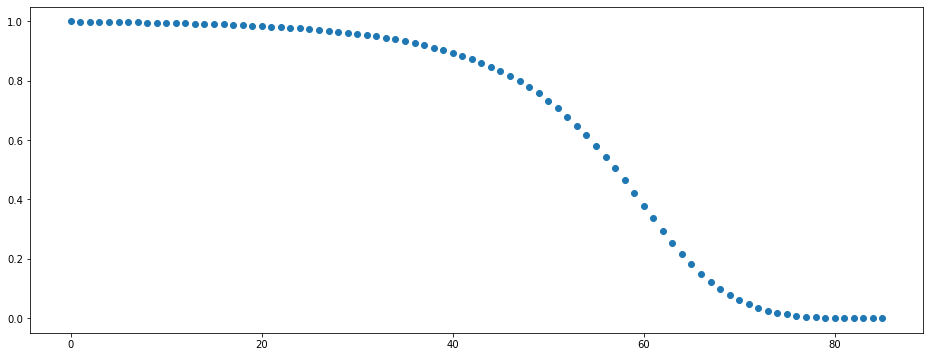

In [22]:
# Creating the vector tp30
fig, ax = plt.subplots(figsize=[16,6])

time = np.arange(0, len(qx['AT_2000_F'])-30)
probs = [Ax_continuous.calc_tpx(t, x=30) for t in time]
plt.scatter(time, probs);

## Fitting a new survival function: ${}_{t}p_{x} \rightarrow S_{x}(t)$

The next step is to find a continuous funtion that fits on the pair data points generated by the vector time and the function ${}_{t}p_{30}$. But before that it is necessary to fit a continuous function to the function ${}_{t}p_{0}$, i.e, $S_0(t)$. To do that we must use the ``fit_Survival_from_birth`` method.

In [23]:
Ax_continuous.fit_Survival_from_birth(deg=5)

 MSE: 0.00071


The code above fitted a polynomial function of degree 9 to the function ${}_{t}p_{0}$. The result of ``fit_Survival_from_birth`` method is a ``numpy Polynomial class`` and this allow us to see easyly what are the coefficients:

In [24]:
Ax_continuous.Survival_from_birth_Coef

Polynomial([ 1.82474072e-09, -4.63671679e-07,  3.87831229e-05, -1.31165127e-03,
        1.59185150e-02,  9.56041323e-01], domain=[-1,  1], window=[-1,  1])

Once the $S_0(x)$ is fitted another function is automaticaly generated: $S_{x}(t)$. To use it we just have to call ``Survival_from_age`` method.

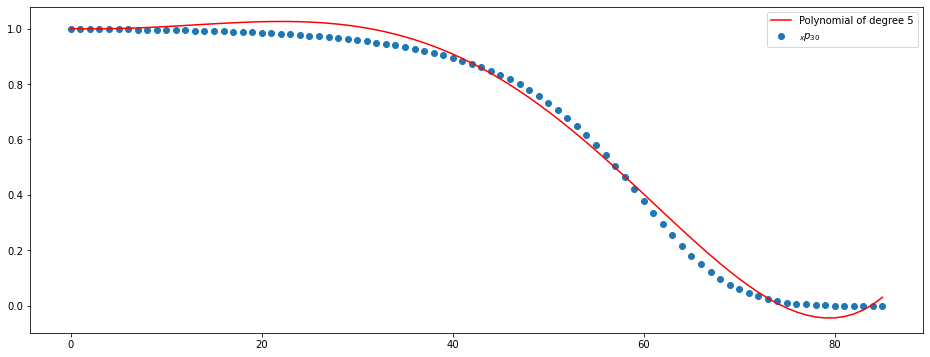

In [25]:
fig, ax = plt.subplots(figsize=[16,6])

plt.scatter(time, probs, label=r'${}_{x}p_{30}$');
y_est = [Ax_continuous.Survival_from_age(age=30, to=t) for t in time]
plt.plot(time, y_est , color='red', label=f'Polynomial of degree {Ax_continuous.Survival_from_birth_Coef.degree()}')
plt.legend();

# The mortality force $\mu_x$

The mortality force, $\mu_x$, is given by:

$$
    \mu_x = - \dfrac{1}{S_0(x)} \dfrac{d}{dx}S_0(x)
$$

And this is why we had to build all of those functions before. Thus, to calculate the force of mortality of given aged $x$ we need to use ``mu_force`` method.

In [26]:
Ax_continuous.mu_force(age=30)

0.0007765258309840422

# Premium for $\bar{A}_{x}$

Remember that when in continuous case the discount factor is given by:

$$
    e^{-\delta t},
$$

and, 

$$
    \bar{A}_{x} = \int_{0}^{\infty} e^{-\delta t} {}_{t}p_{x} \mu_{x+t} \hspace{.2cm} dt .
$$

Than, we need to define a function to be integrated given some $\delta$:

Now, let's calculate the premium!

In [27]:
Ax_continuous.premium(age=30, delta=.06, contract=np.infty, B=1)

/home/matheus/Documentos/GitHub/ActuarialMath/life/continuous_case.py:189: UserWarning: Maybe the premium is not valid. Try to fit a new survival function with a higher degree.
  warnings.warn("Maybe the premium is not valid. Try to fit a new survival function with a higher degree.")


0.03420242603455619

As we can see in the warning maybe the polynomial function fitted does not return probibilistc values. To correct this issue it is convenient to increase the degree of the polynomial survival function.

# Premium for term life on continuous case

Common... I bet you already know what we need to do!

In [28]:
Ax_continuous.premium(age=30, delta=.06, contract=40, B=1)

0.0030213758353296815